# Prerequisites
Ensure you have the necessary libraries installed. You can install bert_score and pandas using pip:

In [16]:
!pip install bert_score

# Script explanation

The script reads data from two CSV files containing reference texts and candidate texts. It ensures both datasets have the same number of samples, processes the data in batches, and calculates the average Precision, Recall, and F1 scores using BERTScore.

In [11]:
from bert_score import score
import pandas as pd

# Đọc dữ liệu từ các tệp CSV
df_references = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/sampled_df.csv')
df_candidates = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/concatenated_file.csv')

# Đảm bảo số lượng mẫu trong cả dữ liệu tham chiếu và ứng viên là bằng nhau
min_samples = min(len(df_references), len(df_candidates))
df_references = df_references.sample(n=min_samples, random_state=42)
df_candidates = df_candidates.sample(n=min_samples, random_state=42)

# Lấy danh sách các văn bản tham chiếu và ứng viên
references = df_references['essay'].values.tolist()
candidates = df_candidates['essay'].values.tolist()

# Tính điểm BERTScore cho toàn bộ tập dữ liệu
P, R, F1 = score(candidates, references, lang="vi", verbose=True)

# Tính điểm trung bình cho toàn bộ tập dữ liệu
avg_P = P.mean().item()
avg_R = R.mean().item()
avg_F1 = F1.mean().item()

print(f"Precision: {avg_P}, Recall: {avg_R}, F1: {avg_F1}")

calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 95.76 seconds, 0.71 sentences/sec
Precision: 0.6155175566673279, Recall: 0.5990347862243652, F1: 0.6066120862960815


In [14]:
from bert_score import score
import pandas as pd

# Đọc dữ liệu từ các tệp CSV
df_references = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/sampled_df.csv')
df_candidates = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/concatenated_file.csv')

# Đảm bảo số lượng mẫu trong cả dữ liệu tham chiếu và ứng viên là bằng nhau
min_samples = min(len(df_references), len(df_candidates))
df_references = df_references.sample(n=min_samples, random_state=42)
df_candidates = df_candidates.sample(n=min_samples, random_state=42)

# Chia dữ liệu thành các batch nhỏ hơn
batch_size = 10
num_batches = min_samples // batch_size

all_P, all_R, all_F1 = [], [], []
results = []

for i in range(num_batches):
    batch_references = df_references.iloc[i*batch_size:(i+1)*batch_size]['essay'].values.tolist()
    batch_candidates = df_candidates.iloc[i*batch_size:(i+1)*batch_size]['essay'].values.tolist()

    P, R, F1 = score(batch_candidates, batch_references, lang="vi", verbose=True)
    all_P.append(P.mean().item())
    all_R.append(R.mean().item())
    all_F1.append(F1.mean().item())

    # Lưu trữ điểm số và các cặp văn bản
    for j in range(len(batch_candidates)):
        results.append({
            'batch_index': i,
            'candidate': batch_candidates[j],
            'reference': batch_references[j],
            'precision': P[j].item(),
            'recall': R[j].item(),
            'f1': F1[j].item()
        })

# Tính điểm trung bình cho toàn bộ tập dữ liệu
avg_P = sum(all_P) / num_batches
avg_R = sum(all_R) / num_batches
avg_F1 = sum(all_F1) / num_batches

print(f"Precision: {avg_P}, Recall: {avg_R}, F1: {avg_F1}")

# Tìm batch có điểm F1 trung bình cao nhất
max_f1_batch_index = all_F1.index(max(all_F1))
print(f"Batch có điểm F1 trung bình cao nhất là batch {max_f1_batch_index} với điểm F1 trung bình là {max(all_F1)}")

# In ra các cặp văn bản trong batch có điểm F1 trung bình cao nhất
optimal_batch_pairs = [res for res in results if res['batch_index'] == max_f1_batch_index]

for pair in optimal_batch_pairs:
    print(f"Candidate: {pair['candidate']}")
    print(f"Reference: {pair['reference']}")
    print(f"Precision: {pair['precision']}, Recall: {pair['recall']}, F1: {pair['f1']}")
    print("-----")


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 20.53 seconds, 0.49 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.67 seconds, 0.51 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.73 seconds, 0.51 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.14 seconds, 0.52 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 20.66 seconds, 0.48 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.76 seconds, 0.51 sentences/sec
Precision: 0.6130358576774597, Recall: 0.5951871971289316, F1: 0.6034377912680308
Batch có điểm F1 trung bình cao nhất là batch 4 với điểm F1 trung bình là 0.6119798421859741
Candidate: The Impact of Isolation on Resilience

The setting in Joe Kurmaskie's essay profoundly impacts the cyclist's resilience, testing his limits in an environment of isolation and desolation. The journey begins with a deceptive sense of peace at the reservoir campground outside of Lodi, California. The early-summer evening and lively conversation with the old-timers create a false sense of security.

As the cyclist follows the old-timers' advice, he quickly finds himself in a barren, unforgiving landscape. The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce.

The lack of water sources, such as the brackish water from the rus

In [13]:
from bert_score import score
import pandas as pd

# Đọc dữ liệu từ các tệp CSV
df_references = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/sampled_df.csv')
df_candidates = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/concatenated_file.csv')

# Đảm bảo số lượng mẫu trong cả dữ liệu tham chiếu và ứng viên là bằng nhau
min_samples = min(len(df_references), len(df_candidates))
df_references = df_references.sample(n=min_samples, random_state=42)
df_candidates = df_candidates.sample(n=min_samples, random_state=42)

# Chia dữ liệu thành các batch nhỏ hơn
batch_size = 10
num_batches = min_samples // batch_size

all_P, all_R, all_F1 = [], [], []
results = []

for i in range(num_batches):
    batch_references = df_references.iloc[i*batch_size:(i+1)*batch_size]['essay'].values.tolist()
    batch_candidates = df_candidates.iloc[i*batch_size:(i+1)*batch_size]['essay'].values.tolist()

    P, R, F1 = score(batch_candidates, batch_references, lang="vi", verbose=True)
    all_P.append(P.mean().item())
    all_R.append(R.mean().item())
    all_F1.append(F1.mean().item())

    # Lưu trữ điểm số và các cặp văn bản
    for j in range(len(batch_candidates)):
        results.append({
            'candidate': batch_candidates[j],
            'reference': batch_references[j],
            'precision': P[j].item(),
            'recall': R[j].item(),
            'f1': F1[j].item()
        })

# Tính điểm trung bình cho toàn bộ tập dữ liệu
avg_P = sum(all_P) / num_batches
avg_R = sum(all_R) / num_batches
avg_F1 = sum(all_F1) / num_batches

print(f"Precision: {avg_P}, Recall: {avg_R}, F1: {avg_F1}")

# Chọn các cặp văn bản có điểm số F1 thấp
low_score_pairs = [res for res in results if res['f1'] < 0.6]

# Phân tích chi tiết các cặp văn bản có điểm số thấp
for pair in low_score_pairs:
    print(f"Candidate: {pair['candidate']}")
    print(f"Reference: {pair['reference']}")
    print(f"Precision: {pair['precision']}, Recall: {pair['recall']}, F1: {pair['f1']}")
    print("-----")

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 22.33 seconds, 0.45 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 20.69 seconds, 0.48 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.11 seconds, 0.52 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 18.05 seconds, 0.55 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 20.17 seconds, 0.50 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 19.90 seconds, 0.50 sentences/sec
Precision: 0.6130358576774597, Recall: 0.5951871971289316, F1: 0.6034377912680308
Candidate: Unforeseen Obstacles: Legal and Practical Hurdles
Discuss the legal and practical obstacles that ultimately thwarted the use of the mooring mast for dirigibles. Explore the existing laws prohibiting low-flying airships over urban areas and the logistical difficulties of safely mooring dirigibles amidst New York City's skyscrapers.
Reference: In the memoir "Narciso Rodriguez", tells us of how @CAPS1 grew up with his parents who which immigrated from Cuba, the mood created by the author is warm & comforting.For example, the mood is comforting because, @CAPS1 speaks of how, his parents created a traditional Cuban home, out of nothing but a one bedroom apartment. @CAPS1 descrbes his life being centered around the kitchen & his parent always provideing what they could the best for him."@CAPS1 also states "I will always be grateful to my parents for their lov

calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 97.70 seconds, 0.70 sentences/sec
Precision: 0.6155175566673279, Recall: 0.5990347862243652, F1: 0.6066120862960815


/Users/nobitad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nobitad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


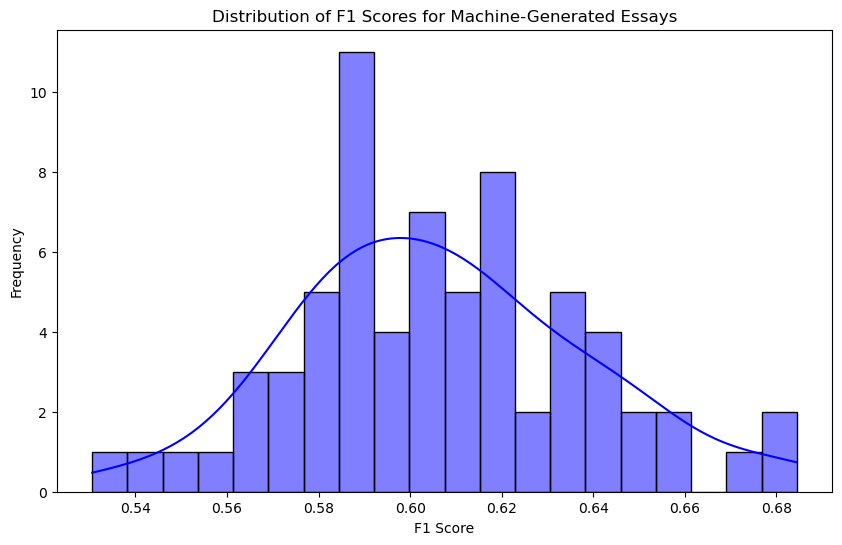


Bài luận có điểm F1 cao nhất:
Candidate: Navigating Cultural Identity in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's encounter with familiar plants highlights the complexities of navigating cultural identity in a new environment. Despite feeling alienated and disconnected in the United States, Saeng finds solace and comfort in the presence of plants from her homeland. The closing paragraph, where Saeng resolves to retake her driver's test, symbolizes her determination to forge a sense of belonging while honoring her Vietnamese heritage.
Reference: The author ends the story with that paragraph because she is trying to overcome an obstacle. Failing the drivers test was a set back for Saeng so she plans to take it again. She plans to use the hibiscus as motivation, because the winter for the hibiscus is like overcoming an obstacle.
Precision: 0.6730895638465881, Recall: 0.6961941719055176, F1: 0.6844469308853149
-----

Bài luận có điểm F1 thấp nhất:
Candidate: The Empi

/Users/nobitad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nobitad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nobitad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


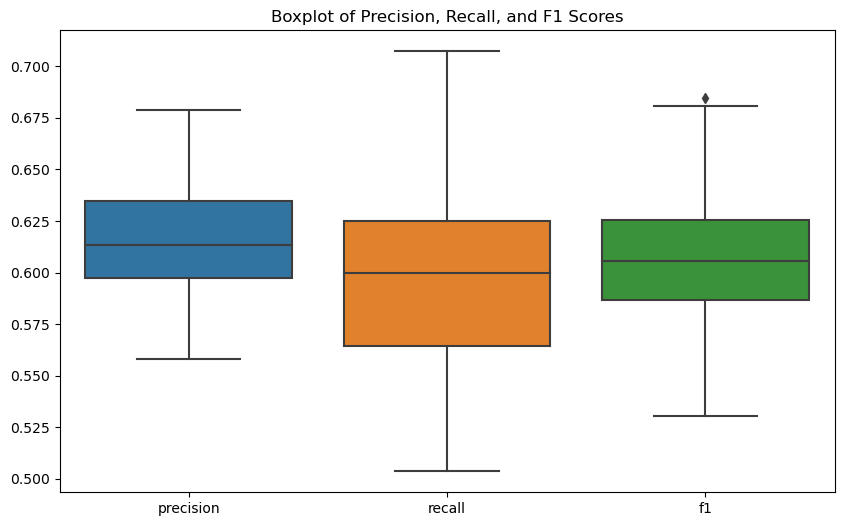


Top 5 bài luận có điểm F1 cao nhất:
Candidate: Navigating Cultural Identity in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's encounter with familiar plants highlights the complexities of navigating cultural identity in a new environment. Despite feeling alienated and disconnected in the United States, Saeng finds solace and comfort in the presence of plants from her homeland. The closing paragraph, where Saeng resolves to retake her driver's test, symbolizes her determination to forge a sense of belonging while honoring her Vietnamese heritage.
Reference: The author ends the story with that paragraph because she is trying to overcome an obstacle. Failing the drivers test was a set back for Saeng so she plans to take it again. She plans to use the hibiscus as motivation, because the winter for the hibiscus is like overcoming an obstacle.
Precision: 0.6730895638465881, Recall: 0.6961941719055176, F1: 0.6844469308853149
-----
Candidate: The Journey Through Isolation

The

In [23]:
from bert_score import score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ các tệp CSV
df_references = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/sampled_df.csv')
df_candidates = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/concatenated_file.csv')

# Đảm bảo số lượng mẫu trong cả dữ liệu tham chiếu và ứng viên là bằng nhau
min_samples = min(len(df_references), len(df_candidates))
df_references = df_references.sample(n=min_samples, random_state=42).reset_index(drop=True)
df_candidates = df_candidates.sample(n=min_samples, random_state=42).reset_index(drop=True)

# Lấy các bài luận và tính BERTScore
references = df_references['essay'].values.tolist()  
candidates = df_candidates['essay'].values.tolist()  

# Tính toán BERTScore
P, R, F1 = score(candidates, references, lang="vi", verbose=True)

# Thêm điểm số vào DataFrame
df_candidates['precision'] = P.tolist()
df_candidates['recall'] = R.tolist()
df_candidates['f1'] = F1.tolist()

# Tính điểm trung bình cho toàn bộ tập dữ liệu
avg_P = P.mean().item()
avg_R = R.mean().item()
avg_F1 = F1.mean().item()

print(f"Precision: {avg_P}, Recall: {avg_R}, F1: {avg_F1}")

# Trực quan hóa phân phối điểm số
plt.figure(figsize=(10, 6))
sns.histplot(df_candidates['f1'], kde=True, bins=20, color='blue')
plt.xlabel('F1 Score')
plt.ylabel('Frequency')
plt.title('Distribution of F1 Scores for Machine-Generated Essays')
plt.show()

# Tìm bài luận có điểm F1 cao nhất và thấp nhất
max_f1_idx = df_candidates['f1'].idxmax()
min_f1_idx = df_candidates['f1'].idxmin()

print("\nBài luận có điểm F1 cao nhất:")
print(f"Candidate: {df_candidates.loc[max_f1_idx, 'essay']}")
print(f"Reference: {df_references.loc[max_f1_idx, 'essay']}")
print(f"Precision: {df_candidates.loc[max_f1_idx, 'precision']}, Recall: {df_candidates.loc[max_f1_idx, 'recall']}, F1: {df_candidates.loc[max_f1_idx, 'f1']}")
print("-----")

print("\nBài luận có điểm F1 thấp nhất:")
print(f"Candidate: {df_candidates.loc[min_f1_idx, 'essay']}")
print(f"Reference: {df_references.loc[min_f1_idx, 'essay']}")
print(f"Precision: {df_candidates.loc[min_f1_idx, 'precision']}, Recall: {df_candidates.loc[min_f1_idx, 'recall']}, F1: {df_candidates.loc[min_f1_idx, 'f1']}")
print("-----")

# Thêm biểu đồ boxplot để so sánh phân phối điểm số
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_candidates[['precision', 'recall', 'f1']])
plt.title('Boxplot of Precision, Recall, and F1 Scores')
plt.show()

# Phân tích thêm các bài luận có điểm F1 cao nhất và thấp nhất
df_candidates_sorted = df_candidates.sort_values(by='f1', ascending=False)

print("\nTop 5 bài luận có điểm F1 cao nhất:")
for idx, row in df_candidates_sorted.head(5).iterrows():
    print(f"Candidate: {row['essay']}")
    print(f"Reference: {df_references.loc[idx, 'essay']}")
    print(f"Precision: {row['precision']}, Recall: {row['recall']}, F1: {row['f1']}")
    print("-----")

print("\nTop 5 bài luận có điểm F1 thấp nhất:")
for idx, row in df_candidates_sorted.tail(5).iterrows():
    print(f"Candidate: {row['essay']}")
    print(f"Reference: {df_references.loc[idx, 'essay']}")
   